In [26]:
import pandas as pd
#import missingno as msno
from numpy.core.multiarray import result_type
import numpy as np



In [27]:
# read tha data in many file and merge it in one dictionary
filemainpath = "/home/freitas/Downloads/internet2/data/"
keep = ['CNPJ','AN_EXERCICIO','IEX']
df = {}
for year in range(2015, 2020):
    filename = f'iex_inep_{year}.CSV'
    df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, sep=',', encoding='latin1')
    df['iex_'+str(year)] = df['iex_'+str(year)][keep]
    df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
    df['iex'+str(year)] = df['iex_'+str(year)].dropna()
    df['iex'+str(year)] = df['iex'+str(year)].drop_duplicates()
    print({year},df['iex_'+str(year)].shape)
for year in range(2020,2022):
    filename = f'iex_inep_{year}.CSV'
    df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, sep=';', encoding='latin1')
    df['iex_'+str(year)] = df['iex_'+str(year)][keep]
    df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
    print({year},df['iex_'+str(year)].shape)


{2015} (103781, 3)
{2016} (104795, 3)
{2017} (110910, 3)
{2018} (110910, 3)
{2019} (110910, 3)
{2020} (110910, 3)
{2021} (110906, 3)


In [28]:
print(df.keys())
# merge all dataframes in the dictionary into one dataframe
df = pd.concat(df.values(), ignore_index=True)


dict_keys(['iex_2015', 'iex2015', 'iex_2016', 'iex2016', 'iex_2017', 'iex2017', 'iex_2018', 'iex2018', 'iex_2019', 'iex2019', 'iex_2020', 'iex_2021'])


In [29]:
# read data
#df = pd.read_csv('/home/freitas/Downloads/internet2/data/IEx_2014_2020.csv',sep=';')
print(df.shape)
df.head()

(1304428, 3)


,CNPJ,ANO,IEX
0,49000144,2015,8.356554
1,304000159,2015,10.000000
2,16130000112,2015,10.000000
3,26034000155,2015,10.000000
4,28175000107,2015,10.000000


In [30]:
df.dtypes

CNPJ      int64
ANO       int64
IEX     float64
dtype: object

In [31]:
# convert CNPJ to float
#df['CNPJ'] = df['CNPJ'].astype(float)
#df['CNPJ'] = df['CNPJ'].astype(int)
df.describe()

,CNPJ,ANO,IEX
count,1.304428e+06,1.304428e+06,1.304428e+06
mean,1.556722e+13,2.018647e+03,6.512797e+00
std,2.198699e+13,2.191457e+00,6.678433e+01
min,4.900014e+07,2.015000e+03,0.000000e+00
25%,2.326306e+12,2.016000e+03,2.180810e+00
50%,7.492923e+12,2.020000e+03,6.859357e+00
75%,1.670806e+13,2.020000e+03,9.906768e+00
max,9.859586e+13,2.021000e+03,9.999000e+03


In [32]:
df.sort_values(by=['IEX'],ascending=False).head(20)

,CNPJ,ANO,IEX
136334,3162845000171,2015,9999.0
32553,3162845000171,2015,9999.0
1552,671880000128,2015,9998.0
81080,15904824000163,2015,9998.0
105333,671880000128,2015,9998.0
184861,15904824000163,2015,9998.0
717629,14066491000188,2020,9997.0
939449,14066491000188,2020,9997.0
1050359,14066491000188,2020,9997.0
495809,14066491000188,2020,9997.0


In [33]:
#drop lines with iex < 0 and iex > 10
df.query('IEX >= 0 and IEX <= 10', inplace=True)
df.describe()


,CNPJ,ANO,IEX
count,1.304320e+06,1.304320e+06,1.304320e+06
mean,1.556741e+13,2.018647e+03,5.959305e+00
std,2.198746e+13,2.191434e+00,3.920561e+00
min,4.900014e+07,2.015000e+03,0.000000e+00
25%,2.326306e+12,2.016000e+03,2.179631e+00
50%,7.492923e+12,2.020000e+03,6.858050e+00
75%,1.670633e+13,2.020000e+03,9.906701e+00
max,9.859586e+13,2.021000e+03,1.000000e+01


In [34]:
escola = pd.read_csv('/home/freitas/Downloads/internet2/data/Chave_escolas_censo.csv')
escola = escola[['CO_ESCOLA','NU_CGC_ENTIDADE']]
escola.rename(columns={'NU_CGC_ENTIDADE':'CNPJ'},inplace=True)
escola.dtypes

CO_ESCOLA    int64
CNPJ         int64
dtype: object

In [35]:
merge_iex_escola = pd.merge(df, escola, on='CNPJ', how='left')
merge_iex_escola.dropna(inplace=True)
merge_iex_escola['CO_ESCOLA'] = merge_iex_escola['CO_ESCOLA'].astype(int)
merge_iex_escola

,CNPJ,ANO,IEX,CO_ESCOLA
0,49000144,2015,8.356554,35075577
1,304000159,2015,10.000000,35062807
2,16130000112,2015,10.000000,35074962
3,26034000155,2015,10.000000,35076090
4,28175000107,2015,10.000000,52096564
...,...,...,...,...
1311297,97551810000178,2021,9.981760,31224871
1311298,97552446000160,2021,4.387468,31349585
1311299,97552912000108,2021,6.463446,15096912
1311300,97553564000193,2021,9.887141,31220124


In [36]:
merge_iex_escola.isna().sum()
merge_iex_escola.dropna(inplace=True)
print(merge_iex_escola.shape)
merge_iex_escola.head()

(1255316, 4)


,CNPJ,ANO,IEX,CO_ESCOLA
0,49000144,2015,8.356554,35075577
1,304000159,2015,10.000000,35062807
2,16130000112,2015,10.000000,35074962
3,26034000155,2015,10.000000,35076090
4,28175000107,2015,10.000000,52096564


In [37]:
censo = pd.read_csv('/home/freitas/Downloads/internet2/data/censo_2014_2021.csv')
# rename columns CO_ENTIDADE to CO_ESCOLA
censo.rename(columns={'NU_ANO_CENSO':'ANO','CO_ENTIDADE':'CO_ESCOLA'},inplace=True)
censo.query('ANO > 2014', inplace=True)
print(censo.shape)
censo.tail()

(996683, 28)


,ANO,SG_UF,CO_ESCOLA,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,IN_PREDIO_COMPARTILHADO,IN_AGUA_REDE_PUBLICA,...,IN_QUADRA_ESPORTES,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA
1146421,2021,DF,53068190,5300108,1,2,1,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146422,2021,DF,53068203,5300108,1,2,1,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146423,2021,DF,53068211,5300108,1,2,1,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146424,2021,DF,53068220,5300108,1,2,1,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146425,2021,DF,53068238,5300108,1,2,1,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [38]:
merge_iex_censo = pd.merge(merge_iex_escola, censo, on=['ANO','CO_ESCOLA'], how='inner')
print(merge_iex_censo.shape)
merge_iex_censo.tail()


(1253748, 30)


,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_QUADRA_ESPORTES,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA
1253743,97551810000178,2021,9.981760,31224871,MG,3140506,1,3,1,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1253744,97552446000160,2021,4.387468,31349585,MG,3106705,1,3,1,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1253745,97552912000108,2021,6.463446,15096912,PA,1507607,1,3,2,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,0.0
1253746,97553564000193,2021,9.887141,31220124,MG,3161403,1,3,1,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1253747,98595861000164,2021,8.438259,43165311,RS,4322608,1,2,2,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [39]:
merge_iex_censo.isna().sum()

CNPJ                               0
ANO                                0
IEX                                0
CO_ESCOLA                          0
SG_UF                              0
CO_MUNICIPIO                       0
TP_SITUACAO_FUNCIONAMENTO          0
TP_DEPENDENCIA                     0
TP_LOCALIZACAO                     0
IN_LOCAL_FUNC_GALPAO               0
IN_PREDIO_COMPARTILHADO        11004
IN_AGUA_REDE_PUBLICA               0
IN_ENERGIA_REDE_PUBLICA            0
IN_LIXO_SERVICO_COLETA             0
IN_ALMOXARIFADO                    0
IN_AUDITORIO                       0
IN_BIBLIOTECA                      0
IN_BIBLIOTECA_SALA_LEITURA         0
IN_LABORATORIO_CIENCIAS            0
IN_LABORATORIO_INFORMATICA         0
IN_QUADRA_ESPORTES                 0
IN_SALA_DIRETORIA                  0
IN_SECRETARIA                      0
IN_COMPUTADOR                      0
IN_EQUIP_COPIADORA                 0
IN_EQUIP_IMPRESSORA                0
IN_INTERNET                        0
I

In [48]:
banco = pd.read_csv('/home/freitas/Downloads/internet2/data/ag_demo_2014_2020.csv',sep=';',encoding='latin1')
banco2021 = pd.read_csv('/home/freitas/Downloads/internet2/data/ag_demo_2021.csv',sep=';',encoding='latin1')
banco = pd.concat([banco,banco2021],ignore_index=True)
banco.rename(columns={'ano':'ANO','CodMun':"CO_MUNICIPIO","POP.EST":"POP"},inplace=True)
banco = banco[['ANO','CO_MUNICIPIO','possui_agencia_BB','POP']]
print(banco.shape)



(44560, 4)


,ANO,CO_MUNICIPIO,possui_agencia_BB,POP


In [41]:
merge_iex_censo_banco = pd.merge(merge_iex_censo, banco, on = ['ANO','CO_MUNICIPIO'], how='left')
print(merge_iex_censo_banco.shape)
merge_iex_censo_banco.head()

(2001103, 32)


,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA,possui_agencia_BB,POP
0,49000144,2015,8.356554,35075577,SP,3550308,1,3,1,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11967825.0
1,49000144,2015,8.356554,35075577,SP,3550308,1,3,1,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,11967825.0
2,304000159,2015,10.000000,35062807,SP,3550308,1,3,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,11967825.0
3,304000159,2015,10.000000,35062807,SP,3550308,1,3,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,11967825.0
4,16130000112,2015,10.000000,35074962,SP,3526902,1,3,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,296440.0


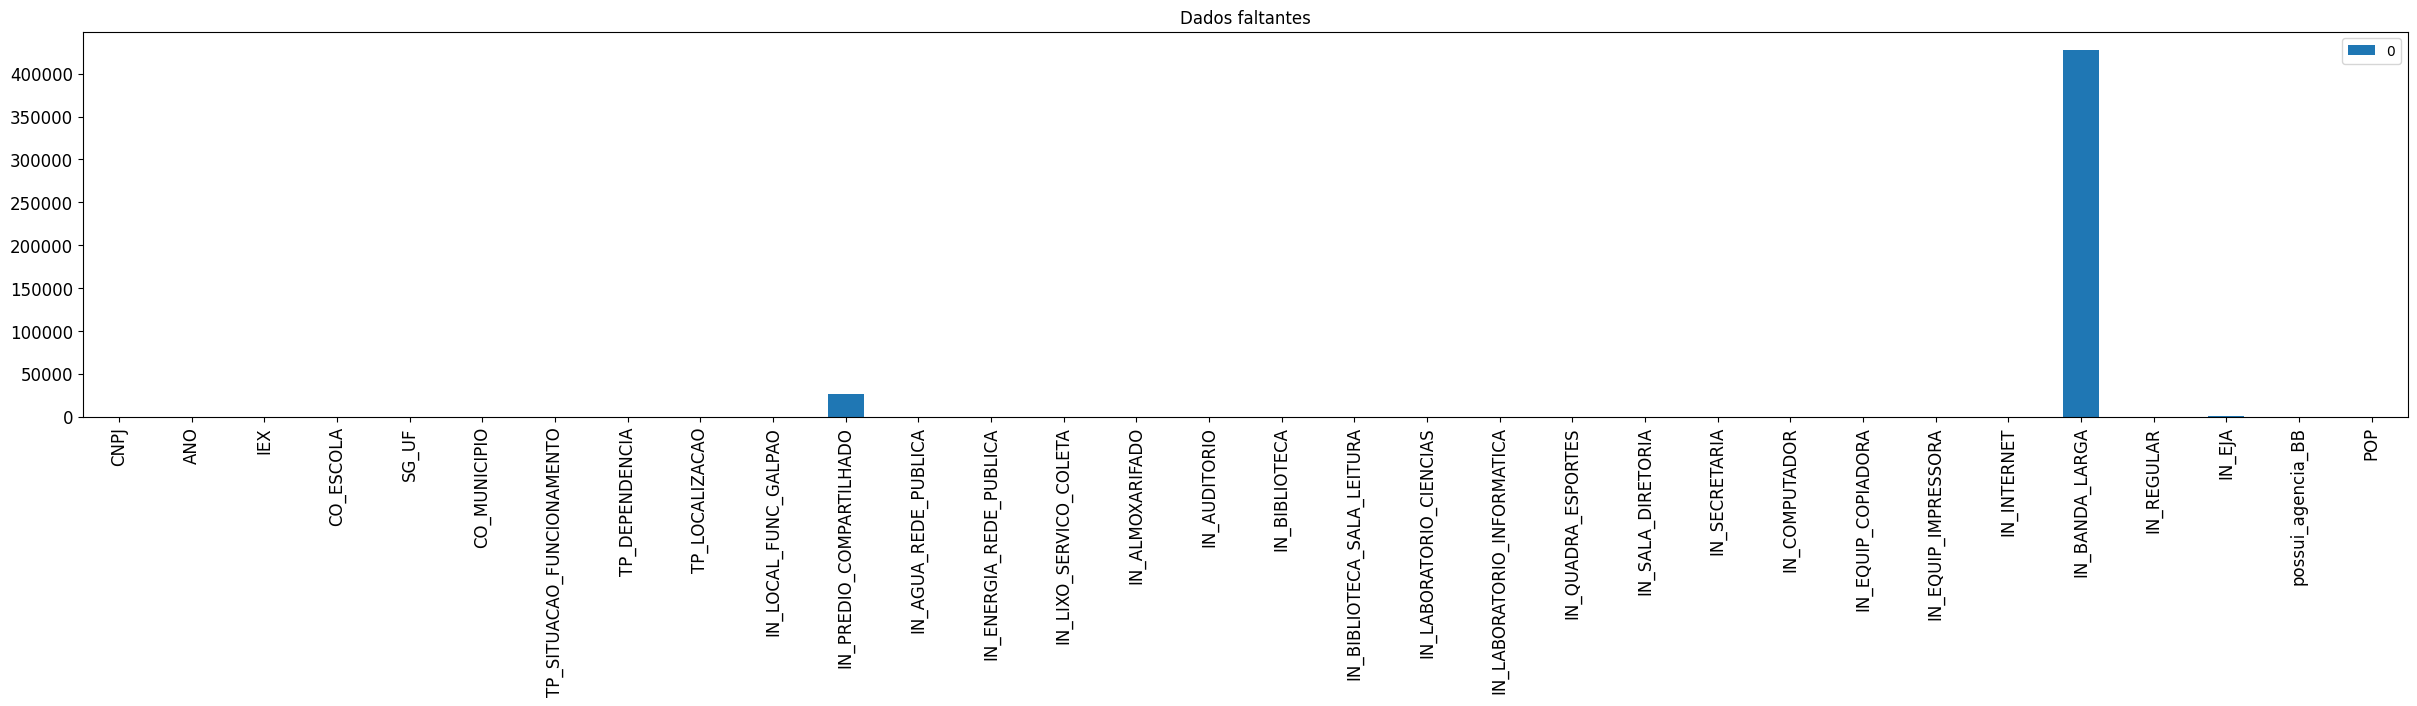

In [38]:
pd.DataFrame(merge_iex_censo_banco.isnull().sum()).plot(kind='bar',title='Dados faltantes',fontsize=12,figsize=(30,5));

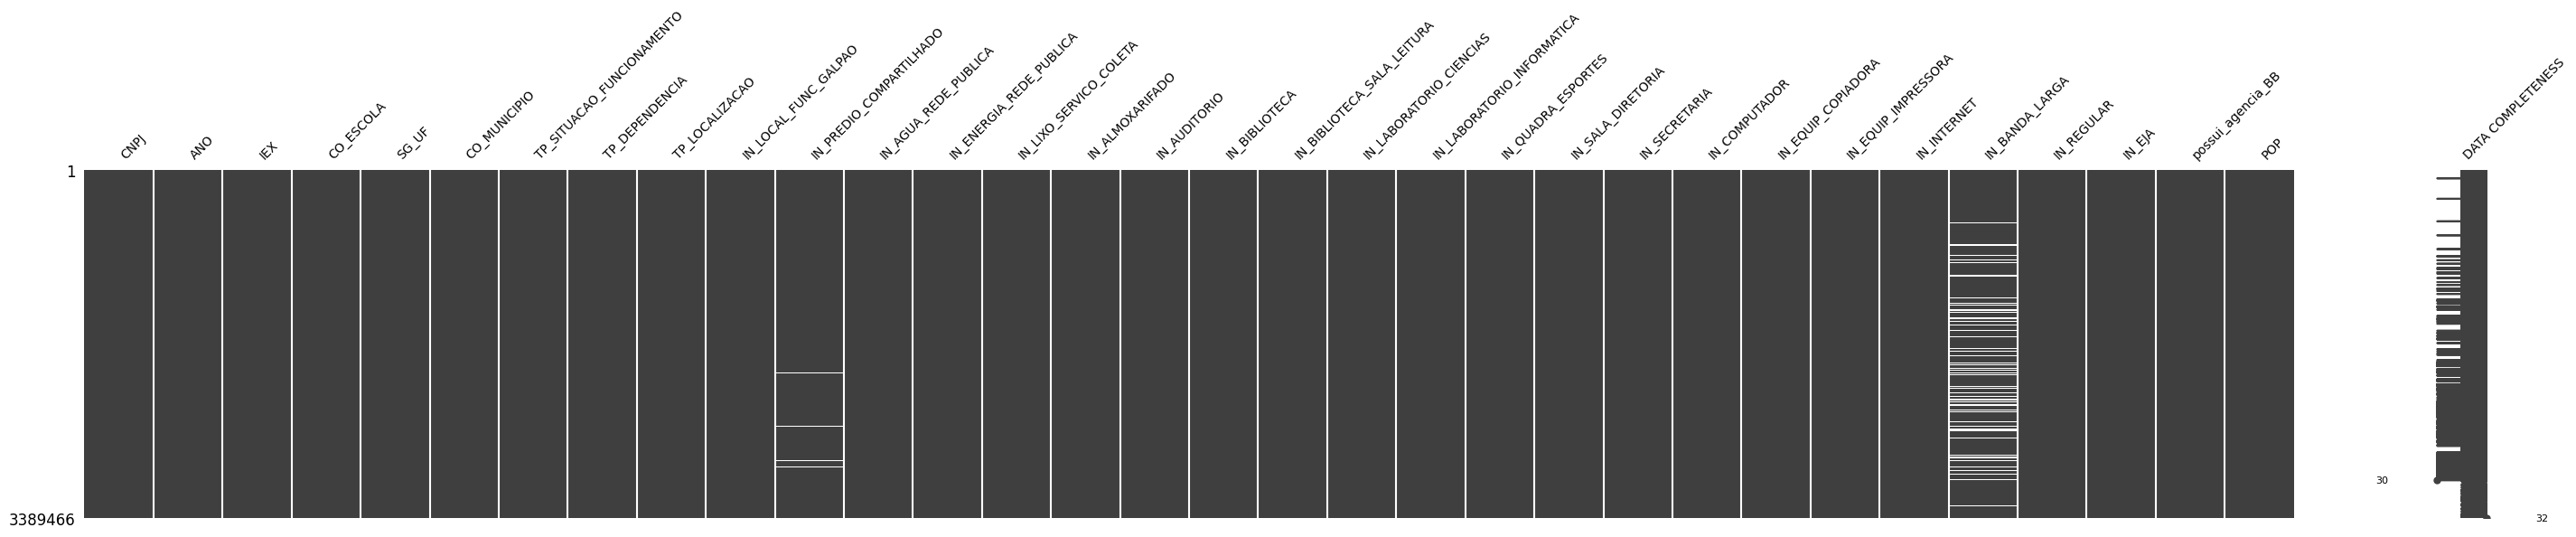

In [39]:
msno.matrix(merge_iex_censo_banco,labels=True,fontsize=10,figsize=(35,5));

In [40]:
merge_iex_censo_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389466 entries, 0 to 3389465
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   CNPJ                        int64  
 1   ANO                         int64  
 2   IEX                         float64
 3   CO_ESCOLA                   float64
 4   SG_UF                       object 
 5   CO_MUNICIPIO                int64  
 6   TP_SITUACAO_FUNCIONAMENTO   int64  
 7   TP_DEPENDENCIA              int64  
 8   TP_LOCALIZACAO              int64  
 9   IN_LOCAL_FUNC_GALPAO        float64
 10  IN_PREDIO_COMPARTILHADO     float64
 11  IN_AGUA_REDE_PUBLICA        float64
 12  IN_ENERGIA_REDE_PUBLICA     float64
 13  IN_LIXO_SERVICO_COLETA      float64
 14  IN_ALMOXARIFADO             float64
 15  IN_AUDITORIO                float64
 16  IN_BIBLIOTECA               float64
 17  IN_BIBLIOTECA_SALA_LEITURA  float64
 18  IN_LABORATORIO_CIENCIAS     float64
 19  IN_LABORATORIO_INFORM

In [41]:
merge_iex_censo_banco.isna().sum()[:20]

CNPJ                              0
ANO                               0
IEX                               0
CO_ESCOLA                         0
SG_UF                             0
CO_MUNICIPIO                      0
TP_SITUACAO_FUNCIONAMENTO         0
TP_DEPENDENCIA                    0
TP_LOCALIZACAO                    0
IN_LOCAL_FUNC_GALPAO              0
IN_PREDIO_COMPARTILHADO       26272
IN_AGUA_REDE_PUBLICA              0
IN_ENERGIA_REDE_PUBLICA           0
IN_LIXO_SERVICO_COLETA            0
IN_ALMOXARIFADO                   0
IN_AUDITORIO                      0
IN_BIBLIOTECA                     0
IN_BIBLIOTECA_SALA_LEITURA        0
IN_LABORATORIO_CIENCIAS           0
IN_LABORATORIO_INFORMATICA        0
dtype: int64

In [42]:
merge_iex_censo_banco.isna().sum()[20:40]

IN_QUADRA_ESPORTES          0
IN_SALA_DIRETORIA           0
IN_SECRETARIA               0
IN_COMPUTADOR               0
IN_EQUIP_COPIADORA          0
IN_EQUIP_IMPRESSORA         0
IN_INTERNET                 0
IN_BANDA_LARGA         427784
IN_REGULAR                  0
IN_EJA                    138
possui_agencia_BB           0
POP                         0
dtype: int64

In [44]:
merge_iex_censo_banco.drop(columns='IN_BANDA_LARGA',inplace=True)

In [45]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer1.fit(merge_iex_censo_banco[['IN_PREDIO_COMPARTILHADO']])
merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = imputer1.transform(merge_iex_censo_banco[['IN_PREDIO_COMPARTILHADO']])
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer2.fit(merge_iex_censo_banco[['IN_EJA']])
merge_iex_censo_banco['IN_EJA'] = imputer2.transform(merge_iex_censo_banco[['IN_EJA']])



# merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].fillna(pd.NA)
# merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].fillna(pd.NA)
# merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].fillna(pd.NA)

# merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].fillna(2)
# merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].fillna(2)
# merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].fillna(2)
# merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].replace(2,pd.NA)  
# merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].replace(2,pd.NA)
# merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].replace(2,pd.NA)




In [46]:
merge_iex_censo_banco.dtypes

CNPJ                            int64
ANO                             int64
IEX                           float64
CO_ESCOLA                     float64
SG_UF                          object
CO_MUNICIPIO                    int64
TP_SITUACAO_FUNCIONAMENTO       int64
TP_DEPENDENCIA                  int64
TP_LOCALIZACAO                  int64
IN_LOCAL_FUNC_GALPAO          float64
IN_PREDIO_COMPARTILHADO       float64
IN_AGUA_REDE_PUBLICA          float64
IN_ENERGIA_REDE_PUBLICA       float64
IN_LIXO_SERVICO_COLETA        float64
IN_ALMOXARIFADO               float64
IN_AUDITORIO                  float64
IN_BIBLIOTECA                 float64
IN_BIBLIOTECA_SALA_LEITURA    float64
IN_LABORATORIO_CIENCIAS       float64
IN_LABORATORIO_INFORMATICA    float64
IN_QUADRA_ESPORTES            float64
IN_SALA_DIRETORIA             float64
IN_SECRETARIA                 float64
IN_COMPUTADOR                 float64
IN_EQUIP_COPIADORA            float64
IN_EQUIP_IMPRESSORA           float64
IN_INTERNET 

In [47]:
varlist = merge_iex_censo_banco.columns[9:-2] 
# varlist =['IN_LOCAL_FUNC_GALPAO',
#        'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA',
#        'IN_LIXO_SERVICO_COLETA', 'IN_ALMOXARIFADO', 'IN_AUDITORIO',
#        'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA',
#        'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
#        'IN_QUADRA_ESPORTES', 'IN_SALA_DIRETORIA', 'IN_SECRETARIA',
#        'IN_COMPUTADOR', 'IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA',
#        'IN_INTERNET', 'IN_REGULAR'],
for var in varlist:
    merge_iex_censo_banco[var] = merge_iex_censo_banco[var].astype(int)

In [48]:
merge_iex_censo_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389466 entries, 0 to 3389465
Data columns (total 31 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   CNPJ                        int64  
 1   ANO                         int64  
 2   IEX                         float64
 3   CO_ESCOLA                   float64
 4   SG_UF                       object 
 5   CO_MUNICIPIO                int64  
 6   TP_SITUACAO_FUNCIONAMENTO   int64  
 7   TP_DEPENDENCIA              int64  
 8   TP_LOCALIZACAO              int64  
 9   IN_LOCAL_FUNC_GALPAO        int64  
 10  IN_PREDIO_COMPARTILHADO     int64  
 11  IN_AGUA_REDE_PUBLICA        int64  
 12  IN_ENERGIA_REDE_PUBLICA     int64  
 13  IN_LIXO_SERVICO_COLETA      int64  
 14  IN_ALMOXARIFADO             int64  
 15  IN_AUDITORIO                int64  
 16  IN_BIBLIOTECA               int64  
 17  IN_BIBLIOTECA_SALA_LEITURA  int64  
 18  IN_LABORATORIO_CIENCIAS     int64  
 19  IN_LABORATORIO_INFORM

0

In [50]:
merge_iex_censo_banco.to_csv('/home/freitas/Downloads/internet2/data/merge_iex_censo_banco2015-2021.csv')